<img src="banner.png" width="60%">

In [ ]:
# Ana Mantilla: anagmd2019@gmail.com
# Paul Goyes: goyes.yesid@gmail.com

In [83]:
import gempy as gp
import gempy_viewer as gpv

# Aux imports
import numpy as np
import os

from gempy_engine.config import AvailableBackends

np.random.seed(1515)

In [102]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='ModelGraben',
    extent=[0, 2000, 0, 1000, -1000, 0],
    resolution=[50, 50, 50],
    refinement=6,
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations="Orientaciones.csv",
        path_to_surface_points="Puntos.csv",
    )
)

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


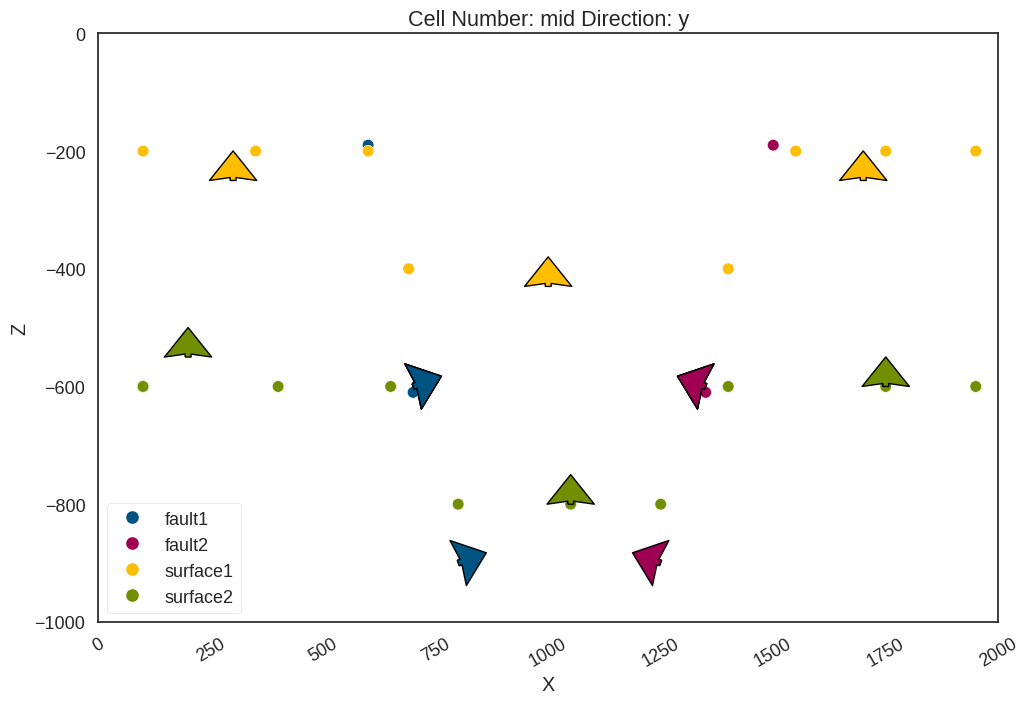

In [103]:
gpv.plot_2d(geo_model)

In [104]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=fault1,
	color=#015482,
	is_active=True
),
Element(
	name=fault2,
	color=#9f0052,
	is_active=True
),
Element(
	name=surface1,
	color=#ffbe00,
	is_active=True
),
Element(
	name=surface2,
	color=#728f02,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [105]:
geo_model.input_transform.apply_anisotropy(gp.data.GlobalAnisotropy.NONE)

In [106]:
fault1: gp.data.StructuralElement = geo_model.structural_frame.get_element_by_name("fault1")
fault2: gp.data.StructuralElement = geo_model.structural_frame.get_element_by_name("fault2")

In [107]:
# Remove the faults from the default group
default_group: gp.data.StructuralGroup = geo_model.structural_frame.get_group_by_name("default_formation")
default_group.elements.remove(fault1)
default_group.elements.remove(fault2)

In [108]:
# Add a new group for the fault
gp.add_structural_group(
    model=geo_model,
    group_index=0,
    structural_group_name="fault1",
    elements=[fault1],
    structural_relation=gp.data.StackRelationType.FAULT,
    fault_relations=gp.data.FaultsRelationSpecialCase.OFFSET_ALL
)


gp.add_structural_group(
    model=geo_model,
    group_index=1,
    structural_group_name="fault2",
    elements=[fault2],
    structural_relation=gp.data.StackRelationType.FAULT,
    fault_relations=gp.data.FaultsRelationSpecialCase.OFFSET_ALL
)

#print(geo_model.structural_frame)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=fault1,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=fault1,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=fault2,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=fault2,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=surface1,
	color=#ffbe00,
	is_active=True
),
Element(
	name=surface2,
	color=#728f02,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True,  True],
 [False, False,  True],
 [False, False, False]],

In [109]:
gp.compute_model(
    gempy_model=geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=AvailableBackends.PYTORCH
    )
)

Setting Backend To: AvailableBackends.PYTORCH
Chunking done: 11 chunks
Chunking done: 8 chunks
Chunking done: 8 chunks
Chunking done: 18 chunks
Chunking done: 8 chunks
Chunking done: 8 chunks
Chunking done: 18 chunks


Solutions(6 Octree Levels, 4 DualContouringMeshes)

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


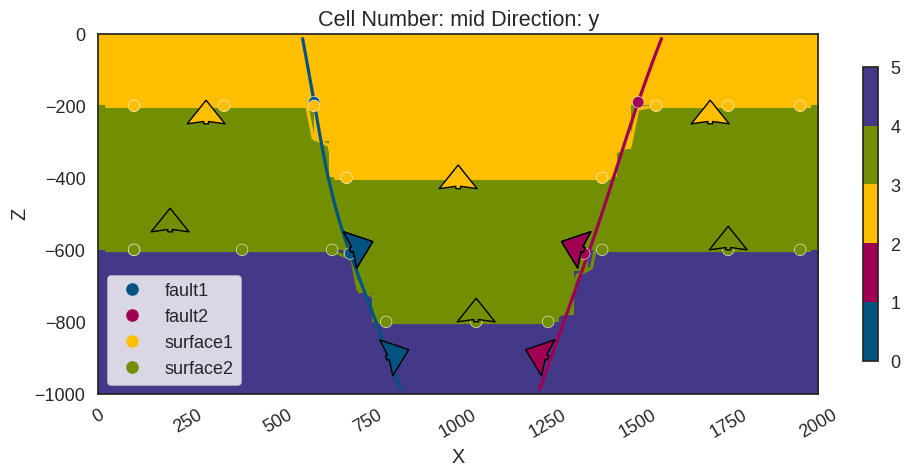

In [110]:
gpv.plot_2d(geo_model, show_data=True)

In [101]:
gpv.plot_3d(geo_model)